In [9]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.model_selection import *
from sklearn.tree import *
from sklearn.metrics import *
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [10]:
itemcat=pd.read_csv("item_categories.csv")
itemcat

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4
...,...,...
79,Служебные,79
80,Служебные - Билеты,80
81,Чистые носители (шпиль),81
82,Чистые носители (штучные),82


In [11]:
items=pd.read_csv("items.csv")
items

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
...,...,...,...
22165,"Ядерный титбит 2 [PC, Цифровая версия]",22165,31
22166,Язык запросов 1С:Предприятия [Цифровая версия],22166,54
22167,Язык запросов 1С:Предприятия 8 (+CD). Хрустале...,22167,49
22168,Яйцо для Little Inu,22168,62


In [12]:
train=pd.read_csv("sales_train.csv")
train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0
2935845,09.10.2015,33,25,7460,299.00,1.0
2935846,14.10.2015,33,25,7459,349.00,1.0
2935847,22.10.2015,33,25,7440,299.00,1.0


In [13]:
sample=pd.read_csv("sample_submission.csv")
sample

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5
...,...,...
214195,214195,0.5
214196,214196,0.5
214197,214197,0.5
214198,214198,0.5


In [14]:
shops=pd.read_csv("shops.csv")
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [15]:
test=pd.read_csv("test.csv")
test

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268
...,...,...,...
214195,214195,45,18454
214196,214196,45,16188
214197,214197,45,15757
214198,214198,45,19648


In [16]:
train["date"]=pd.to_datetime(train['date'],format='%d.%m.%Y')
train.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


In [17]:
dataset=train.pivot_table(index=['shop_id','item_id'],values=['item_cnt_day'],columns=['date_block_num'],fill_value=0,aggfunc='sum')
dataset.reset_index(inplace=True)
dataset

shop_id item_id item_cnt_day                        ...        \
date_block_num                            0   1  2  3  4  5  6  7  ... 24 25   
0                    0      30            0  31  0  0  0  0  0  0  ...  0  0   
1                    0      31            0  11  0  0  0  0  0  0  ...  0  0   
2                    0      32            6  10  0  0  0  0  0  0  ...  0  0   
3                    0      33            3   3  0  0  0  0  0  0  ...  0  0   
4                    0      35            1  14  0  0  0  0  0  0  ...  0  0   
...                ...     ...          ...  .. .. .. .. .. .. ..  ... .. ..   
424119              59   22154            1   0  0  0  0  0  0  0  ...  0  0   
424120              59   22155            0   0  0  0  0  0  1  0  ...  0  0   
424121              59   22162            0   0  0  0  0  0  0  0  ...  0  9   
424122              59   22164            0   0  0  0  0  0  0  0  ...  0  2   
424123              59   22167            0   0  0  0  0  0  0  0  ...  0  0   

                                        
date_block_num 26 27 28 29 30 31 32 33  
0               0  0  0  0  0  0  0  0  
1               0  0  0  0  0  0  0  0  
2               0  0  0  0  0  0  0  0  
3               0  0  0  0  0  0  0  0  
4               0  0  0  0  0  0  0  0  
...            .. .. .. .. .. .. .. ..  
424119          0  0  0  0  0  0  0  0  
424120          0  0  0  0  0  0  0  0  
424121          4  1  1  0  0  1  0  0  
424122          1  2  0  0  1  0  0  0  
424123          0  0  0  0  0  0  0  0  

[424124 rows x 36 columns]

In [18]:
dataset=pd.merge(test,dataset,on=['item_id','shop_id'],how='left')
dataset

/var/folders/ct/r5w_45pj1ys21sk7w8bjy4fr0000gn/T/ipykernel_8863/3733546142.py:1: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  dataset=pd.merge(test,dataset,on=['item_id','shop_id'],how='left')
/var/folders/ct/r5w_45pj1ys21sk7w8bjy4fr0000gn/T/ipykernel_8863/3733546142.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  dataset=pd.merge(test,dataset,on=['item_id','shop_id'],how='left')


,ID,shop_id,item_id,"(item_cnt_day, 0)","(item_cnt_day, 1)","(item_cnt_day, 2)","(item_cnt_day, 3)","(item_cnt_day, 4)","(item_cnt_day, 5)","(item_cnt_day, 6)",...,"(item_cnt_day, 24)","(item_cnt_day, 25)","(item_cnt_day, 26)","(item_cnt_day, 27)","(item_cnt_day, 28)","(item_cnt_day, 29)","(item_cnt_day, 30)","(item_cnt_day, 31)","(item_cnt_day, 32)","(item_cnt_day, 33)"
0,0,5,5037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,1,5,5320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,5,5233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,3,5,5232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,5,5268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214195,214195,45,18454,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
214196,214196,45,16188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
214197,214197,45,15757,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
214198,214198,45,19648,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
dataset.fillna(0,inplace=True)
dataset.isnull().sum()

ID                    0
shop_id               0
item_id               0
(item_cnt_day, 0)     0
(item_cnt_day, 1)     0
(item_cnt_day, 2)     0
(item_cnt_day, 3)     0
(item_cnt_day, 4)     0
(item_cnt_day, 5)     0
(item_cnt_day, 6)     0
(item_cnt_day, 7)     0
(item_cnt_day, 8)     0
(item_cnt_day, 9)     0
(item_cnt_day, 10)    0
(item_cnt_day, 11)    0
(item_cnt_day, 12)    0
(item_cnt_day, 13)    0
(item_cnt_day, 14)    0
(item_cnt_day, 15)    0
(item_cnt_day, 16)    0
(item_cnt_day, 17)    0
(item_cnt_day, 18)    0
(item_cnt_day, 19)    0
(item_cnt_day, 20)    0
(item_cnt_day, 21)    0
(item_cnt_day, 22)    0
(item_cnt_day, 23)    0
(item_cnt_day, 24)    0
(item_cnt_day, 25)    0
(item_cnt_day, 26)    0
(item_cnt_day, 27)    0
(item_cnt_day, 28)    0
(item_cnt_day, 29)    0
(item_cnt_day, 30)    0
(item_cnt_day, 31)    0
(item_cnt_day, 32)    0
(item_cnt_day, 33)    0
dtype: int64

In [21]:
y=dataset['item_cnt_day',33]
y.shape

(214200,)

In [22]:
x=dataset.drop([('item_cnt_day',33),'shop_id','item_id'],axis=1)
x

,ID,"(item_cnt_day, 0)","(item_cnt_day, 1)","(item_cnt_day, 2)","(item_cnt_day, 3)","(item_cnt_day, 4)","(item_cnt_day, 5)","(item_cnt_day, 6)","(item_cnt_day, 7)","(item_cnt_day, 8)",...,"(item_cnt_day, 23)","(item_cnt_day, 24)","(item_cnt_day, 25)","(item_cnt_day, 26)","(item_cnt_day, 27)","(item_cnt_day, 28)","(item_cnt_day, 29)","(item_cnt_day, 30)","(item_cnt_day, 31)","(item_cnt_day, 32)"
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214195,214195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
214196,214196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
214197,214197,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
214198,214198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,shuffle=True,random_state=3)

In [42]:
X_train.head()

,ID,"(item_cnt_day, 0)","(item_cnt_day, 1)","(item_cnt_day, 2)","(item_cnt_day, 3)","(item_cnt_day, 4)","(item_cnt_day, 5)","(item_cnt_day, 6)","(item_cnt_day, 7)","(item_cnt_day, 8)",...,"(item_cnt_day, 23)","(item_cnt_day, 24)","(item_cnt_day, 25)","(item_cnt_day, 26)","(item_cnt_day, 27)","(item_cnt_day, 28)","(item_cnt_day, 29)","(item_cnt_day, 30)","(item_cnt_day, 31)","(item_cnt_day, 32)"
92060,92060,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26309,26309,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11929,11929,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10437,10437,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,29.0,6.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0
70910,70910,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
X_test.head()

,ID,"(item_cnt_day, 0)","(item_cnt_day, 1)","(item_cnt_day, 2)","(item_cnt_day, 3)","(item_cnt_day, 4)","(item_cnt_day, 5)","(item_cnt_day, 6)","(item_cnt_day, 7)","(item_cnt_day, 8)",...,"(item_cnt_day, 23)","(item_cnt_day, 24)","(item_cnt_day, 25)","(item_cnt_day, 26)","(item_cnt_day, 27)","(item_cnt_day, 28)","(item_cnt_day, 29)","(item_cnt_day, 30)","(item_cnt_day, 31)","(item_cnt_day, 32)"
58357,58357,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,13.0,0.0,0.0,2.0,1.0,2.0,0.0,0.0,3.0,1.0
103411,103411,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,7.0,1.0,2.0,0.0
212055,212055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
119591,119591,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2876,2876,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [45]:
Y_train.head()

92060    0.0
26309    0.0
11929    0.0
10437    1.0
70910    0.0
Name: (item_cnt_day, 33), dtype: float64

In [46]:
Y_test.head()

58357     1.0
103411    1.0
212055    0.0
119591    0.0
2876      0.0
Name: (item_cnt_day, 33), dtype: float64

In [47]:
#Linear regression model
model=LinearRegression()

#dumping the training sets in the model
model.fit(X_train.values,Y_train.values)

#calculating the prediction
pred=model.predict(X_test.values)

#calculating the accuracy
a=r2_score(pred,Y_test)*100
print("Linear regression - ",a)

Linear regression -  21.894537744810815


In [48]:
df=pd.DataFrame({"item_cnt_day":pred})
df

,item_cnt_day
0,0.983817
1,-0.731090
2,0.623413
3,0.090576
4,0.757870
...,...
42835,-0.320997
42836,0.669847
42837,-0.065799
42838,-0.050363


In [49]:
#Lasso Regression
model2=Lasso()

#dumping the training sets in the model
model2.fit(X_train.values,Y_train.values)

#calculating the prediction
prediction=model2.predict(X_test.values)

#calculating the accuracy
b=r2_score(prediction,Y_test.values)*100
print("Lasso regression - ",b)

Lasso regression -  25.728718759419966


In [50]:
df2=pd.DataFrame({"item_cnt_day":prediction})
df2

,item_cnt_day
0,1.575130
1,0.004897
2,0.188401
3,0.003137
4,0.015835
...,...
42835,0.008603
42836,0.011621
42837,0.009422
42838,-0.000900


In [58]:
#Ada Boost Regressor
model4=AdaBoostRegressor()

#dumping the training sets in the model
model4.fit(X_train.values,Y_train.values)

#calculating the prediction
predic=model4.predict(X_test.values)

#calculating the accuracy
c=r2_score(Y_test,predic)*100
print("Ada Boost Regressor - ",c)

Ada Boost Regressor -  17.577940217846123


In [59]:
df3=pd.DataFrame({"item_cnt_day":predic})
df3

,item_cnt_day
0,0.320684
1,0.320684
2,0.320684
3,0.320684
4,0.320684
...,...
42835,0.320684
42836,0.320684
42837,0.320684
42838,0.320684


In [ ]:
Lasso Regression - 25%

Linear Regression - 21%

Ada Boost Regressor - 17%

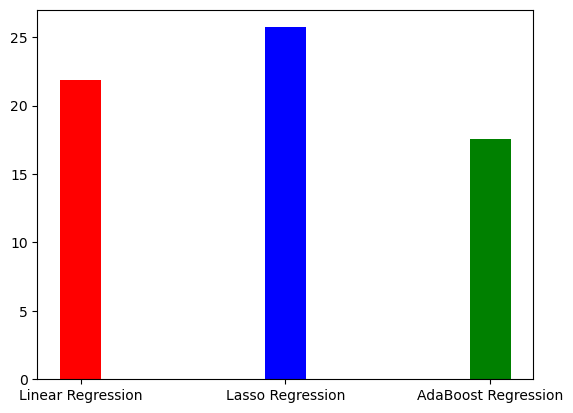

In [60]:
k=[a,b,c]
l=["Linear Regression","Lasso Regression","AdaBoost Regression"]
df=pd.DataFrame({"models":l,"score":k})
plt.bar(l,k,width=0.2,color=['red','blue','green'])
plt.show()